In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [9]:
low_conversion_cost = hydro_opt(h2_to_nh3_plant_cost = 0, h2_to_ch3oh_plant_cost = 0)
low_conversion_cost.optimize()

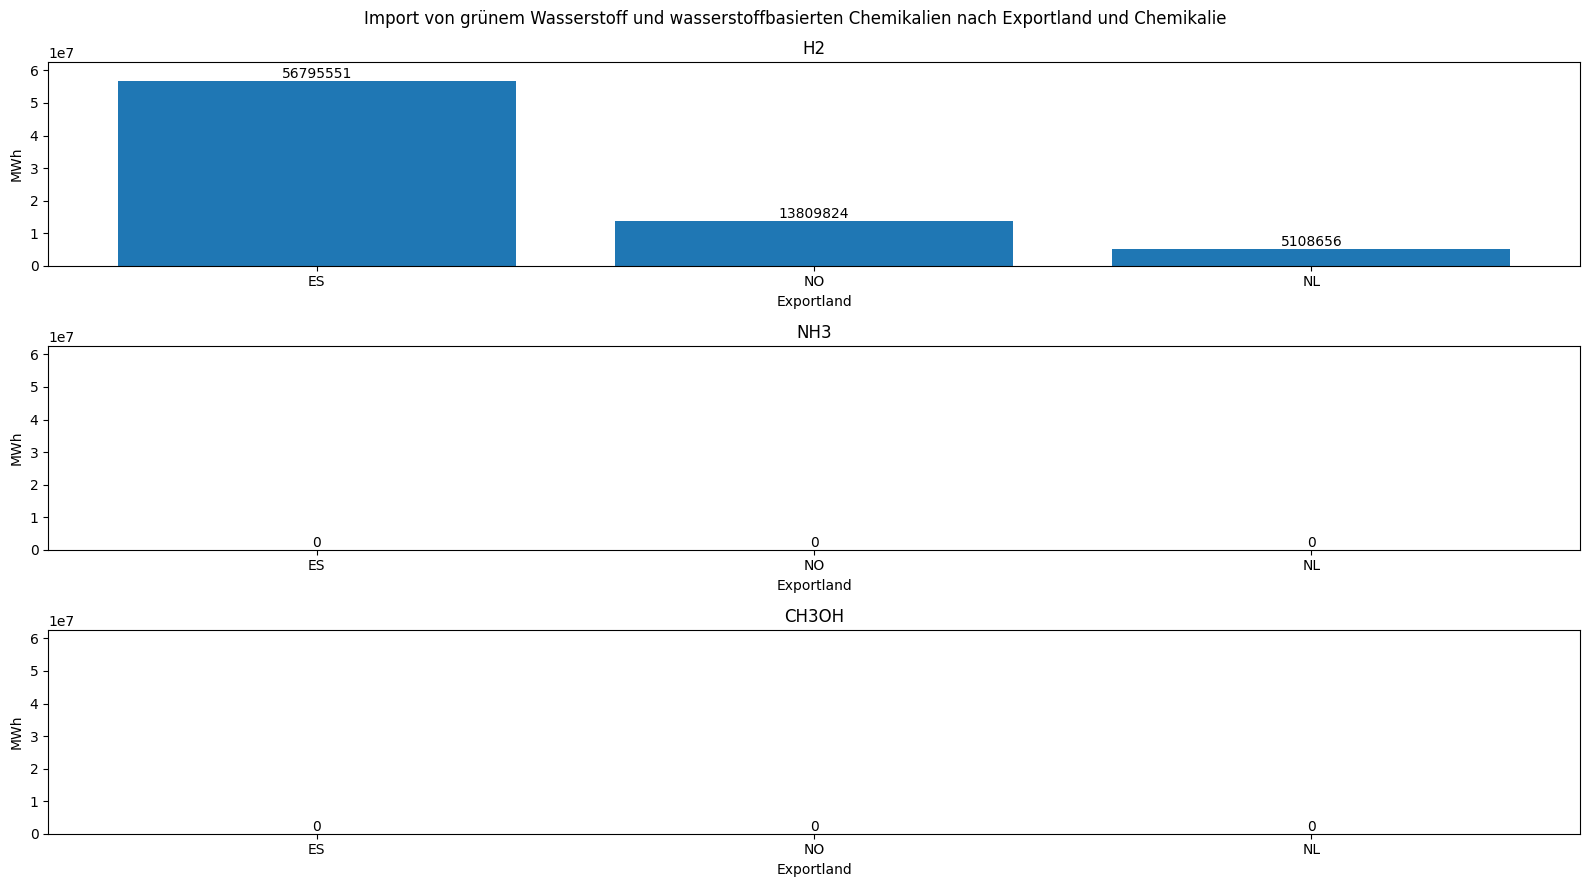

In [4]:
low_conversion_cost.visualize(what="commodities", vis_style="bar")

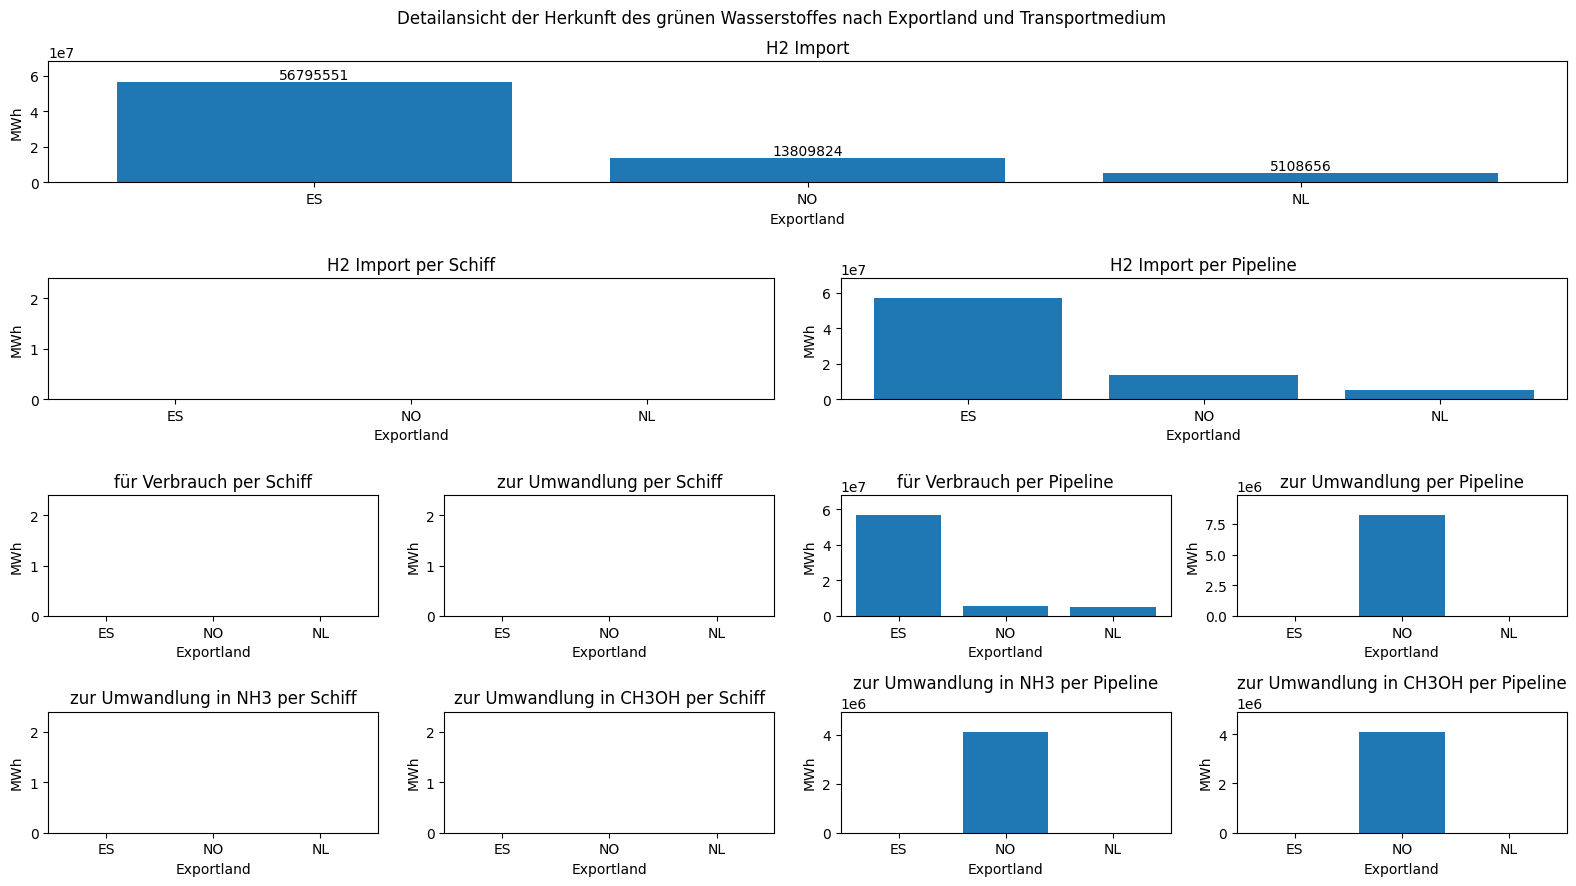

In [45]:
low_conversion_cost.visualize(what="hydrogen_conversion", vis_style="bar")
plt.savefig("Umwandlung - Wasserstoff Detail")

In [6]:
low_conversion_cost_import_limits = hydro_opt(h2_to_nh3_plant_cost = 0, h2_to_ch3oh_plant_cost = 0, use_import_limits = True)
low_conversion_cost_import_limits.optimize()

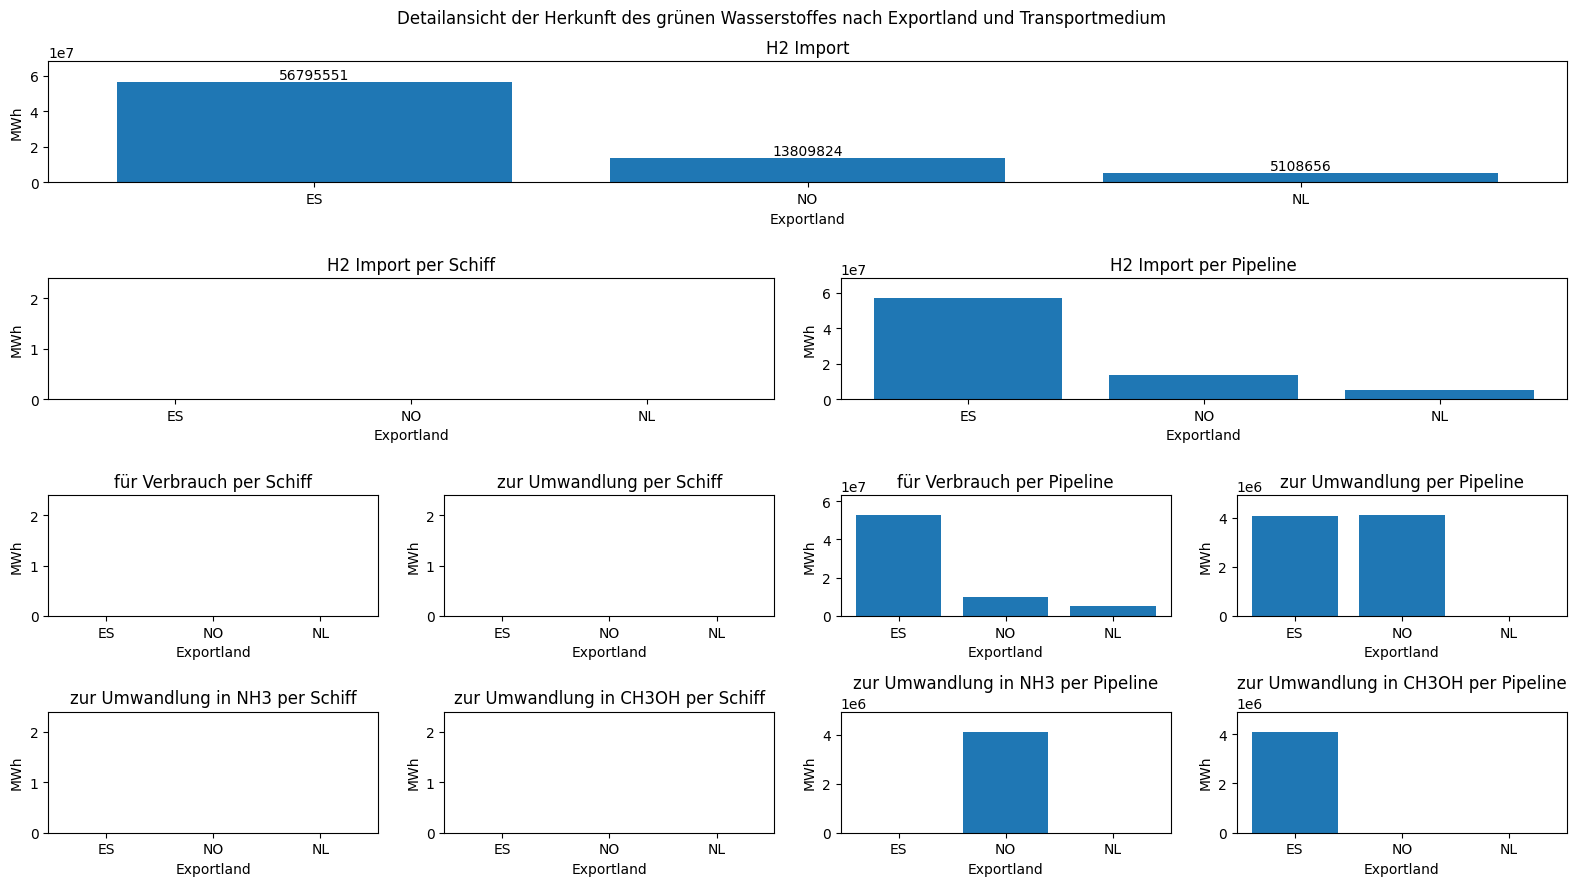

In [7]:
low_conversion_cost_import_limits.visualize(what="hydrogen_conversion", vis_style="bar")

In [15]:
plant_cost = 0
plant_costs =[]
h2_imports = []
nh3_imports = []
h2_to_nh3 = []
ch3oh_imports = []
h2_to_ch3oh = []
while 0 <= plant_cost <= 200:
    model = hydro_opt(de_el_price = 0, de_co2_price = 0, h2_to_nh3_plant_cost = plant_cost, h2_to_ch3oh_plant_cost = plant_cost)
    model.optimize()
    df = model.results_df
    h2_imports.append(df["H2 Import"].sum())
    nh3_imports.append(df["NH3 Import"].sum())
    h2_to_nh3.append(df["H2 für NH3 Umwandlung"].sum())
    ch3oh_imports.append(df["CH3OH Import"].sum())
    h2_to_ch3oh.append(df["H2 für CH3OH Umwandlung"].sum())
    plant_costs.append(plant_cost)
    plant_cost += 1


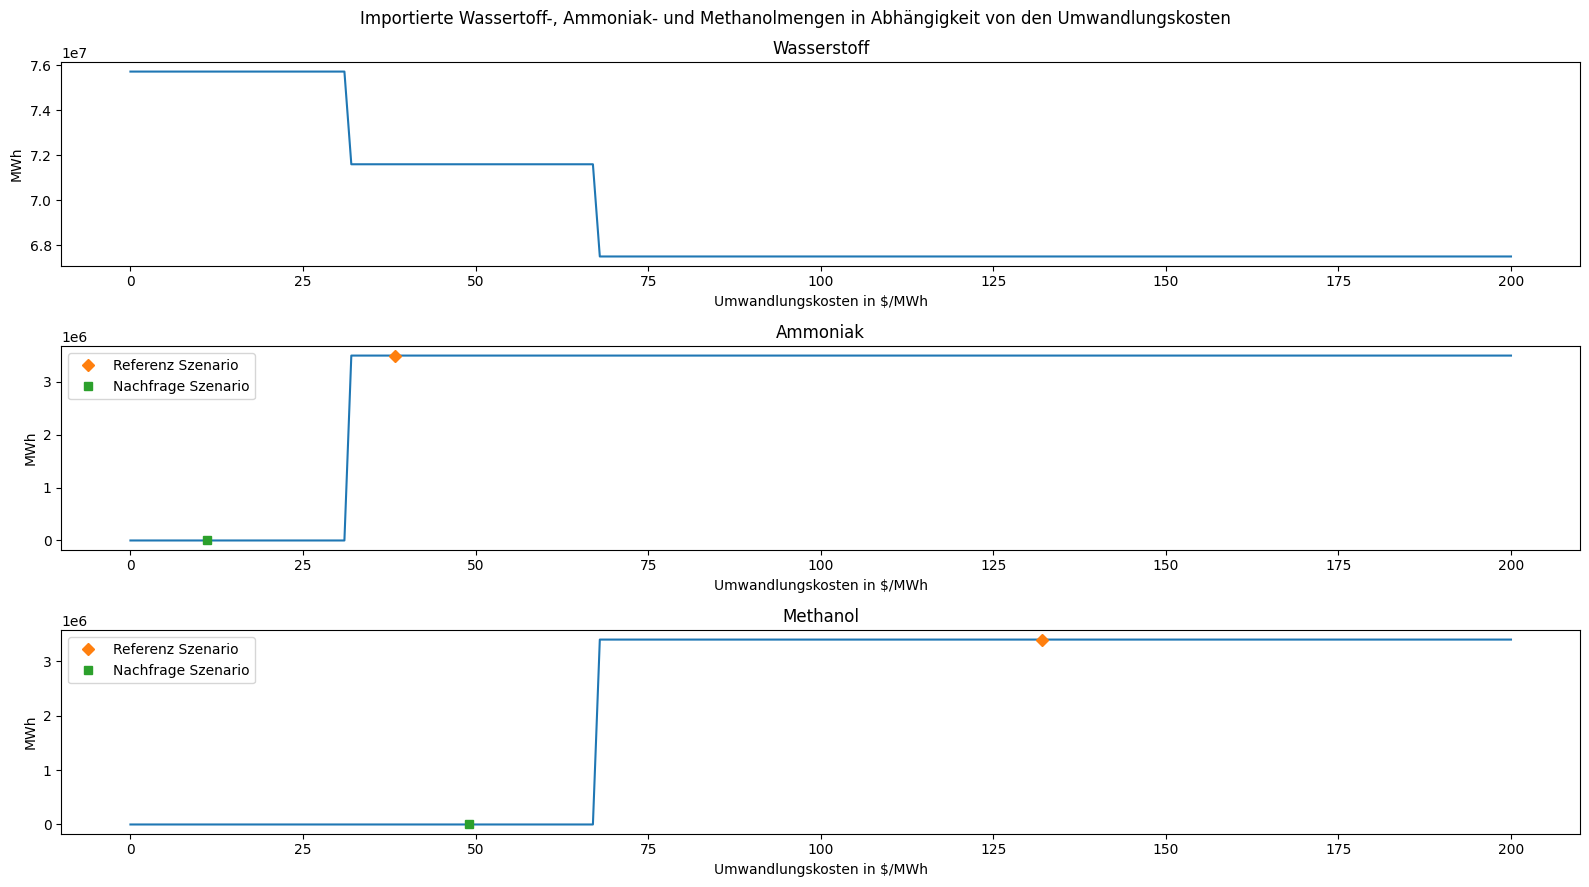

In [46]:
fig, ax = plt.subplots(3,1, figsize = (16,9))
fig.suptitle("Importierte Wassertoff-, Ammoniak- und Methanolmengen in Abhängigkeit von den Umwandlungskosten")  

ax[0].plot(plant_costs, h2_imports)
ax[0].set_title("Wasserstoff")
ax[0].set_ylabel("MWh")
ax[0].set_xlabel("Umwandlungskosten in $/MWh")

ax[1].plot(plant_costs, nh3_imports)
ax[1].plot(38.369,3500000, "D", label='Referenz Szenario')
ax[1].plot(11.0925,0, "s", label='Nachfrage Szenario')
ax[1].legend()
ax[1].set_title("Ammoniak")
ax[1].set_ylabel("MWh")
ax[1].set_xlabel("Umwandlungskosten in $/MWh")


ax[2].plot(plant_costs, ch3oh_imports)
ax[2].plot(132.0115,3400000, "D", label='Referenz Szenario')
ax[2].plot(49.0945,0, "s", label='Nachfrage Szenario')
ax[2].legend()
ax[2].set_title("Methanol")
ax[2].set_ylabel("MWh")
ax[2].set_xlabel("Umwandlungskosten in $/MWh")

plt.tight_layout()
plt.savefig("Umwandlung - importierte Menge", bbox_inches="tight")